# CUSTOMER SEGMENTATION

USECASE : 
<li>To segment customers into different groups. It helps companies to target right customer with right approach.</li>
<li>It is also one of the best practice that data scientists use. They create different model per cluster, It increases over
 all accuracy as model can find patterns easily.</li>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('E:\Education\Datascience\datasets\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# DATA EXPLORATION

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There is only one categorical column and rest four are integer type.

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

As we can see there are no null values

In [6]:
def make_distplot(data, columns):
    
    plt.figure(figsize = (15 , 6))
    n = 0 
    for column in columns:
        n += 1
        plt.subplot(1 , 3 , n)
        plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
        sns.distplot(data[column] , bins = 20)
        plt.title('Distribution of {}'.format(column))
    plt.show()

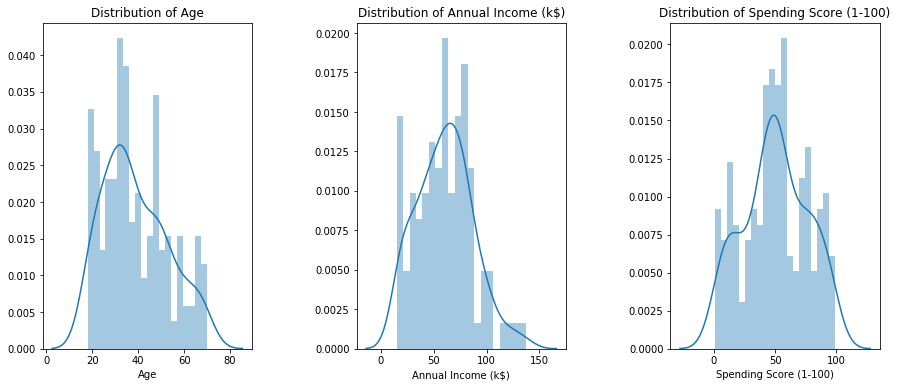

In [7]:
make_distplot(data, ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'])

None of the column follow exactly normal distribution, But we can see that they are no significant outliers.
<br>Based on chart we can conclude that most of the people are between 20 to 40 age and has 30k to 70k annual income.

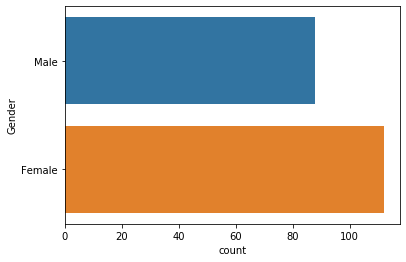

In [8]:
sns.countplot(y = 'Gender' , data = data)
plt.show()

It's roughly equal frequency distribution of gender

In [9]:
def make_violinplot(data, columns):
    
    plt.figure(figsize = (15 , 6))
    n = 0 
    for column in columns:
        n += 1
        plt.subplot(1 , 3 , n)
        plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
        sns.violinplot(x=column, y='Gender', data=data, color='.8')
        sns.swarmplot(x=column, y='Gender', data=data, edgecolor='k', linewidth=.5)
        plt.title('Distribution of {}'.format(column))
    plt.show()

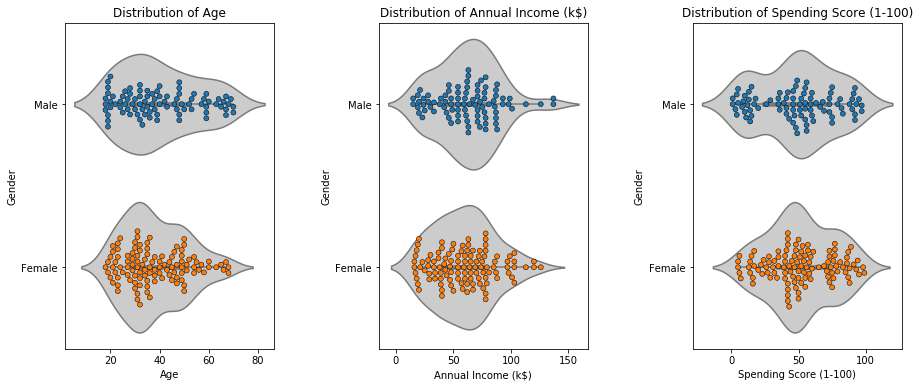

In [10]:
make_violinplot(data, ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'])

Based on above charts we can see that Females spending score is relatively better than Males.

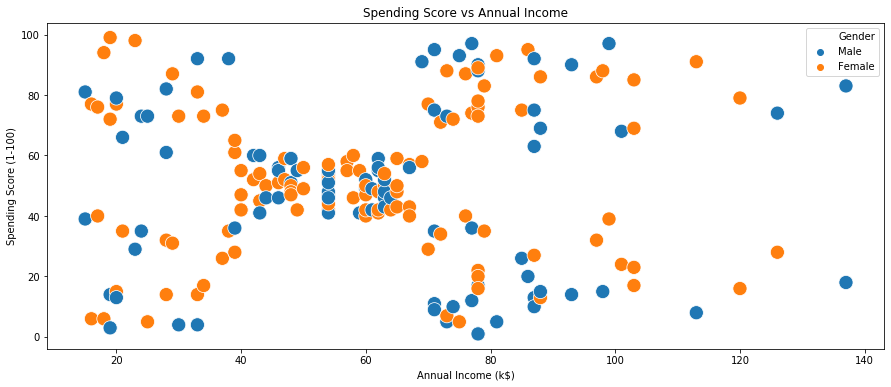

In [11]:
plt.figure(figsize = (15,6))

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data, hue='Gender',s = 200)
    
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)') 
plt.title('Spending Score vs Annual Income')
plt.legend()
plt.show()

We can clearly see that there is some kind of group that behave similarly,  we will identify these groups later with clustering algorithm. For example, there are two groups of people who make more than 80k annually but one group has high spending score where another one have low spending score. By grouping them companies can target them with different offers or products.

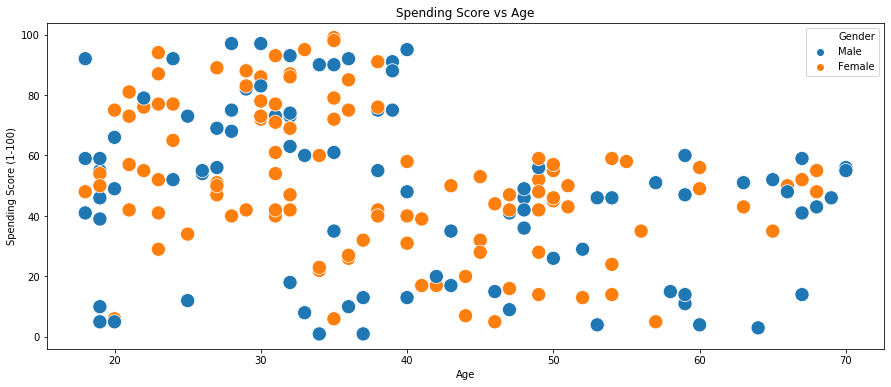

In [12]:
plt.figure(figsize = (15 , 6))

sns.scatterplot(x= 'Age' , y='Spending Score (1-100)', data = data, hue='Gender', s=200)
    
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age') 
plt.title('Spending Score vs Age')
plt.legend()
plt.show()

Here we can clearly see that people whose age is less than 40 have good credit score.

# Model Development

In [18]:
X1 = data[['Age' , 'Spending Score (1-100)']].values
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters=n ,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1)
    model.fit(X1)
    inertia.append(model.inertia_)
    
print(inertia)

[171535.5, 75949.15601023017, 45840.67661610867, 28165.58356662934, 23811.52352472089, 19689.84881221906, 15523.684014328752, 13002.466488382792, 11515.33539021164, 10204.946770824492]


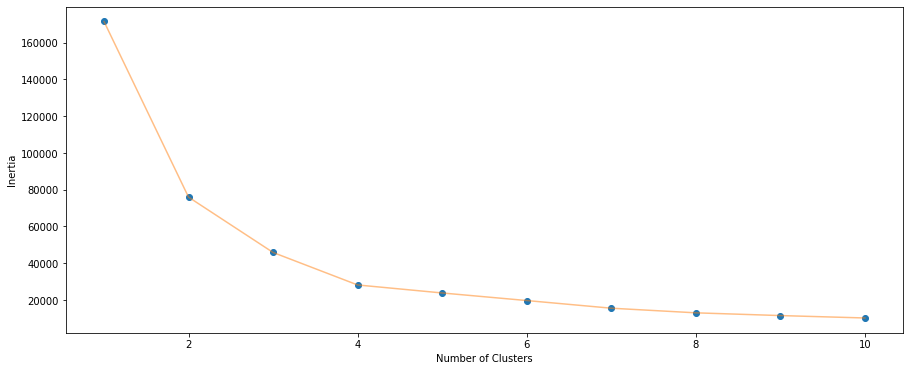

In [19]:
plt.figure(figsize=(15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Inertia is sum of squared error for each cluster, it tells you how much far the data point is from cluster centroid. So lesser the inertia better the clustering. We will choose number of clusters by elbow method. You can see in the graph that after four there is not significant difference. So we will choose four for our clustering method.

In [20]:
model = KMeans(n_clusters=4 ,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1)
model.fit(X1)
    
labels = model.labels_
centroids = model.cluster_centers_

In [21]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 

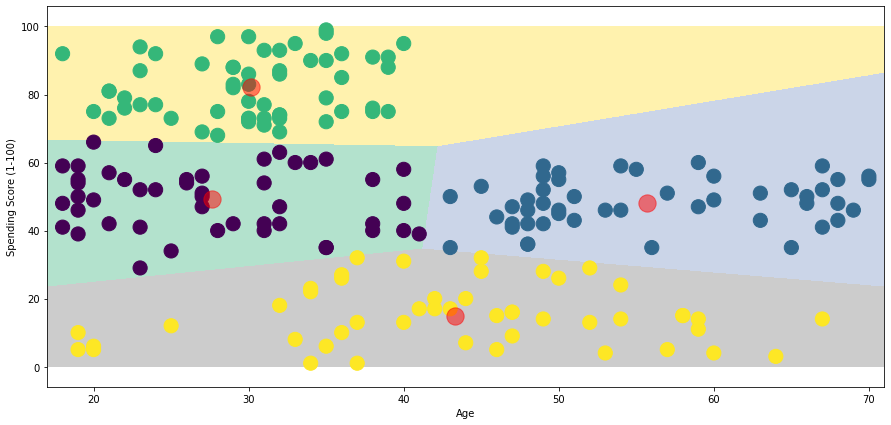

In [22]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()

Z = Z.reshape(xx.shape)

plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age',y = 'Spending Score (1-100)', data = data, c = labels, s = 200 )

plt.scatter(x = centroids[: , 0], y = centroids[: , 1], s = 300, c = 'red', alpha = 0.5)

plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

As shown above now you can target customer based on thier grouping.

In [23]:
X2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].values
inertia2 = []
for n in range(1 , 11):
    model = KMeans(n_clusters=n ,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1)
    model.fit(X2)
    inertia2.append(model.inertia_)
    
print(inertia2)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30227.606513152015, 25011.83934915659, 21818.114588452183, 20239.352683690275]


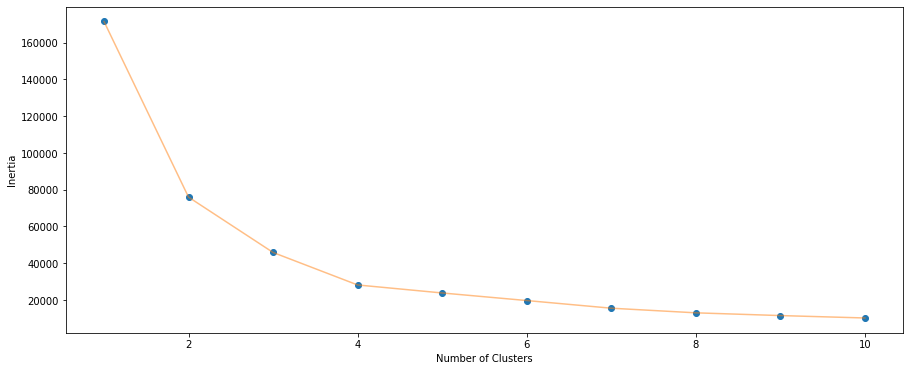

In [24]:
plt.figure(figsize=(15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Here you can either choose four or five as number of clusters, but itried both and five clusters make more sense.

In [25]:
model = KMeans(n_clusters=5 ,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1)
model.fit(X2)
    
labels2 = model.labels_
centroids2 = model.cluster_centers_

In [26]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 

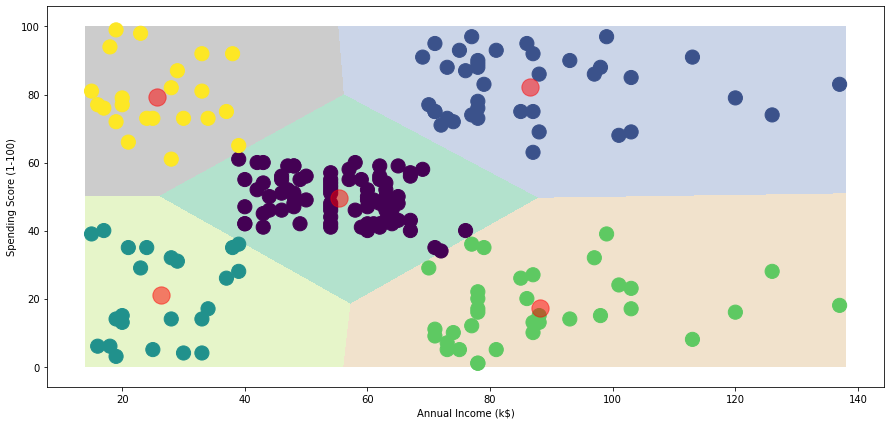

In [27]:
plt.figure(figsize = (15 , 7) )
plt.clf()

Z = Z.reshape(xx.shape)

plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data, c = labels2, s = 200)

plt.scatter(x = centroids2[:,0], y = centroids2[:,1], s = 300, c = 'red', alpha = 0.5)

plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [28]:
X3 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
inertia3 = []
for n in range(1 , 11):
    model = KMeans(n_clusters=n ,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1)
    model.fit(X3)
    inertia3.append(model.inertia_)
    
print(inertia3)

[308812.78, 212840.16982097185, 143342.751571706, 104366.15145556198, 75350.77917248776, 58300.44332159069, 51118.949931647294, 44342.3173934174, 40627.139095652856, 37547.29916871746]


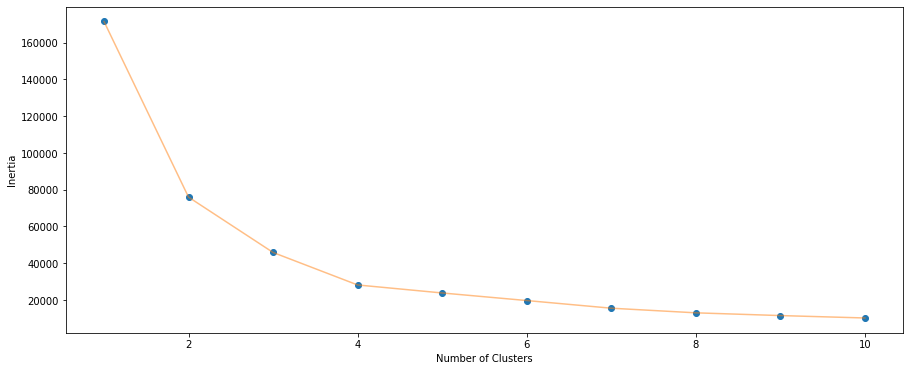

In [29]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11), inertia , 'o')
plt.plot(np.arange(1 , 11), inertia , '-' , alpha = 0.5)

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Based on elbow method I am going to choose five as my number of clusters.

In [34]:
model = KMeans(n_clusters=5 ,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1)
model.fit(X3)
    
labels3 = model.labels_
centroids3 = model.cluster_centers_

In [35]:
data_t = data.copy()

In [36]:
data_t['label3'] =  labels3
trace1 = go.Scatter3d(
    x= data_t['Age'],
    y= data_t['Annual Income (k$)'],
    z= data_t['Spending Score (1-100)'],
    mode='markers',
     marker=dict(
        color = data_t['label3'], 
        size= 20,
        line=dict(
            color= data_t['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data_t = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Annual Income (k$)'),
            zaxis = dict(title  = 'Spending Score (1-100)')
        )
)
fig = go.Figure(data=data_t, layout=layout)
py.offline.iplot(fig)

In [33]:
data['cluster'] = labels3
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


<b>Based on this clusters company can try a different approach to different customer groups. <br>
These clusters are also very useful if you want to build any classification or regression model then creating different model for each cluster gives you a very good and precise result.</b>